**Import Libraries**


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


**Load the Data**

In [26]:
# Read the CSV files
movies_df = pd.read_csv('/content/Movie.csv')
ratings_df = pd.read_csv('/content/ratings.csv')

# Display first few rows of the dataset
print(movies_df.head())
print(ratings_df.head())


   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
   userId  movieId  rating   timestamp
0       1       31     2.5  1260759144
1       1     1029     3.0  1260759179
2       1     1061     3.0  1260759182
3       1     1129     2.0  1260759185
4       1     1172     4.0  1260759205


**Preprocess the Data**

In [27]:
# Drop the genres column from the movies dataframe
movies_df.drop(['genres'], axis=1, inplace=True)

# Keep only relevant columns in the ratings dataframe
ratings_df = ratings_df.loc[:, ["userId", "movieId", "rating"]]

# Merge the movies and ratings dataframes
merged_df = pd.merge(movies_df, ratings_df)
print(merged_df.head())

# Limit the dataset for memory efficiency
merged_df = merged_df.iloc[:1000000]
print(merged_df.shape)

# Basic statistics of the merged dataframe
print(merged_df.describe())


   movieId             title  userId  rating
0        1  Toy Story (1995)       7     3.0
1        1  Toy Story (1995)       9     4.0
2        1  Toy Story (1995)      13     5.0
3        1  Toy Story (1995)      15     2.0
4        1  Toy Story (1995)      19     3.0
(99343, 4)
             movieId        userId        rating
count   99343.000000  99343.000000  99343.000000
mean    11729.947203    346.970204      3.544366
std     24446.426701    194.948232      1.057166
min         1.000000      1.000000      0.500000
25%      1023.000000    182.000000      3.000000
50%      2395.000000    367.000000      4.000000
75%      5341.500000    520.000000      4.000000
max    131168.000000    671.000000      5.000000


**Compute Ratings**

In [28]:
# Calculate mean rating and number of ratings per movie
ratings_summary = pd.DataFrame(merged_df.groupby("title").mean()['rating'])
ratings_summary['number of ratings'] = pd.DataFrame(merged_df.groupby("title").count()["rating"])
print(ratings_summary.head())

# Sort values by rating
sorted_ratings = ratings_summary.sort_values(by='rating', ascending=False)
print(sorted_ratings.head())
print(sorted_ratings.describe())


                                           rating  number of ratings
title                                                               
$9.99 (2008)                             3.833333                  3
'Hellboy': The Seeds of Creation (2004)  2.000000                  1
'Neath the Arizona Skies (1934)          0.500000                  1
'Round Midnight (1986)                   2.250000                  2
'Salem's Lot (2004)                      3.500000                  1
                              rating  number of ratings
title                                                  
Goat, The (1921)                 5.0                  1
Asylum (1972)                    5.0                  1
Two Ninas (1999)                 5.0                  1
Good Earth, The (1937)           5.0                  1
Good Morning, Babylon (1987)     5.0                  1
            rating  number of ratings
count  8792.000000        8792.000000
mean      3.294036          11.299249
std       0

**Visualizations**

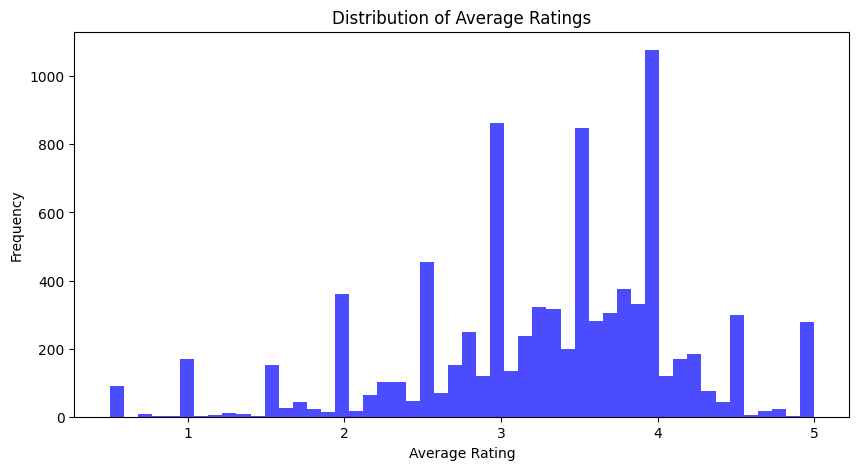

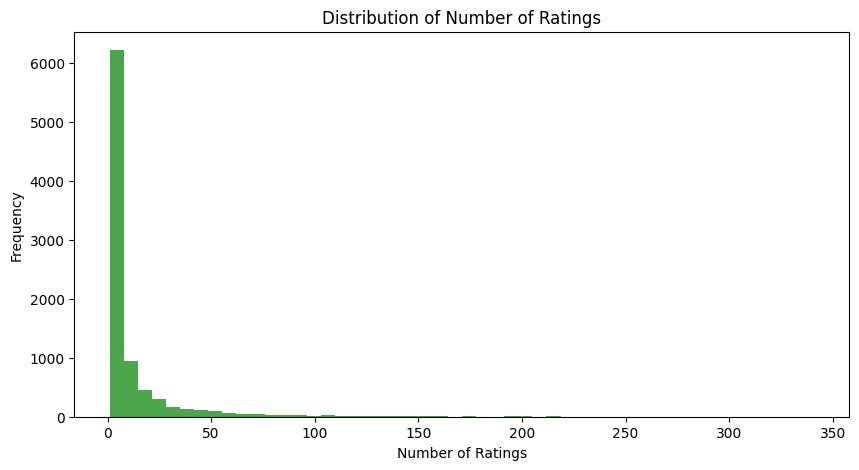

In [29]:
# Distribution of ratings
plt.figure(figsize=(10, 5))
plt.hist(ratings_summary['rating'], bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

# Distribution of number of ratings
plt.figure(figsize=(10, 5))
plt.hist(ratings_summary['number of ratings'], bins=50, color='green', alpha=0.7)
plt.title('Distribution of Number of Ratings')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()


**Create Pivot Table**

In [30]:
# Create pivot table
pivot_table = merged_df.pivot_table(index="userId", columns="title", values="rating")
print(pivot_table.head())
print(pivot_table.shape)


title   $9.99 (2008)  'Hellboy': The Seeds of Creation (2004)  \
userId                                                          
1                NaN                                      NaN   
2                NaN                                      NaN   
3                NaN                                      NaN   
4                NaN                                      NaN   
5                NaN                                      NaN   

title   'Neath the Arizona Skies (1934)  'Round Midnight (1986)  \
userId                                                            
1                                   NaN                     NaN   
2                                   NaN                     NaN   
3                                   NaN                     NaN   
4                                   NaN                     NaN   
5                                   NaN                     NaN   

title   'Salem's Lot (2004)  'Til There Was You (1997)  'burbs, The (1989)

**Recommendation Function**

In [31]:
# Function to recommend movies based on correlation
def recommend_movie(movie):
    movie_watched = pivot_table[movie]
    similarity_with_other_movies = pivot_table.corrwith(movie_watched)
    similarity_with_other_movies = similarity_with_other_movies.sort_values(ascending=False)
    return similarity_with_other_movies.head()

# Test the recommendation function
print(recommend_movie('Toy Story (1995)'))
print(recommend_movie('Taxi Driver (1976)'))


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


title
Thursday (1998)                 1.0
Heat, The (2013)                1.0
Viridiana (1961)                1.0
Carmen (1983)                   1.0
Africa: The Serengeti (1994)    1.0
dtype: float64
title
Kazaam (1996)                          1.0
No Direction Home: Bob Dylan (2005)    1.0
Kolya (Kolja) (1996)                   1.0
Felon (2008)                           1.0
Locke (2013)                           1.0
dtype: float64


In [35]:
print(recommend_movie('Forrest Gump (1994)'))

title
$9.99 (2008)             1.0
Faces of Death (1978)    1.0
Wishmaster (1997)        1.0
Splice (2009)            1.0
Gridlock'd (1997)        1.0
dtype: float64


**Graphs**

<ipython-input-32-ed5f5bc6bcce>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_rated['number of ratings'], y=top_10_rated.index, palette='viridis')


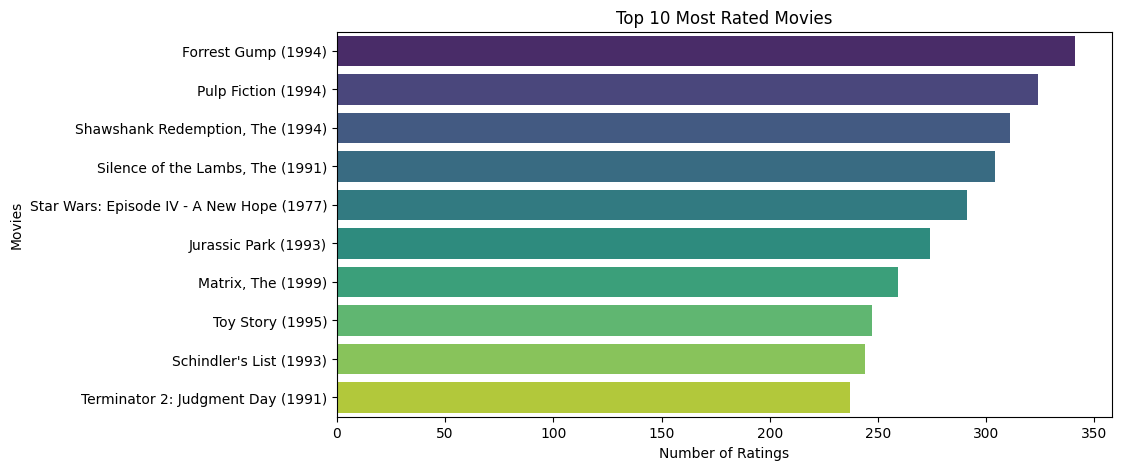

<ipython-input-32-ed5f5bc6bcce>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_highest_rated['rating'], y=top_10_highest_rated.index, palette='magma')


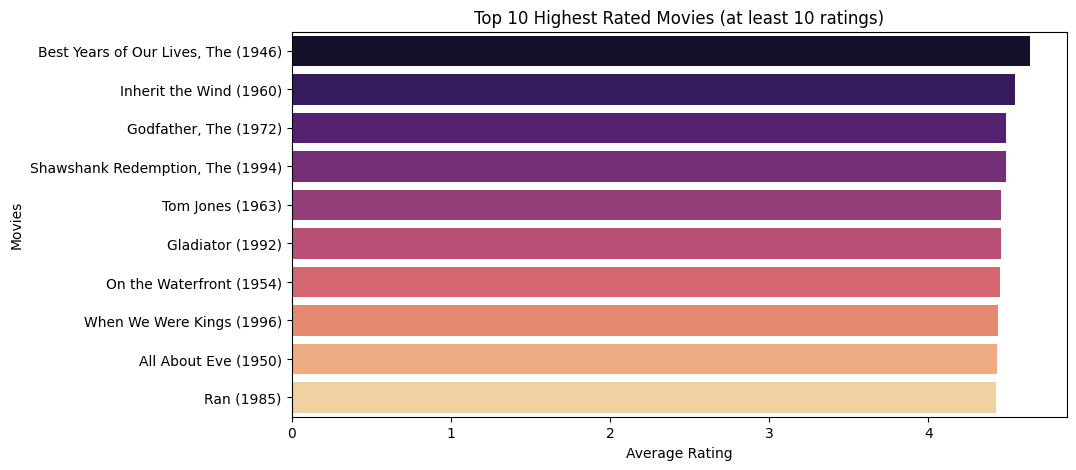

In [32]:
# Top 10 most rated movies
top_10_rated = ratings_summary.sort_values(by='number of ratings', ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_10_rated['number of ratings'], y=top_10_rated.index, palette='viridis')
plt.title('Top 10 Most Rated Movies')
plt.xlabel('Number of Ratings')
plt.ylabel('Movies')
plt.show()

# Top 10 highest rated movies with at least 10 ratings
top_10_highest_rated = ratings_summary[ratings_summary['number of ratings'] >= 10].sort_values(by='rating', ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_10_highest_rated['rating'], y=top_10_highest_rated.index, palette='magma')
plt.title('Top 10 Highest Rated Movies (at least 10 ratings)')
plt.xlabel('Average Rating')
plt.ylabel('Movies')
plt.show()
